# Apache Spark Supplementary Notes

## Spark Introduction

From the quote above, we know that Spark is used for large-scale data processing but what kind of processing is it? It is batch processing and stream processing.

* Batch processing refers, to the processing of the previously collected job in a single batch.
* Stream processing means to deal with Spark streaming data.

Remember how Hadoop use it's MapReduce to batch process large amounts of data? Spark extends Hadoop's MapReduce to the next level but note that Spark is **NOT** an extension of Hadoop. Spark **is independent of Hadoop** as is has its own cluster management system and basically, uses Hadoop for storage purposes only. 

One key feature of Spark is that it has **in-memory cluster computation capability**. This means that processing speed is greatly increased as processes is done in memory instead of on disk. Asummary of the major differences between Spark and Hadoop are highlighted below.

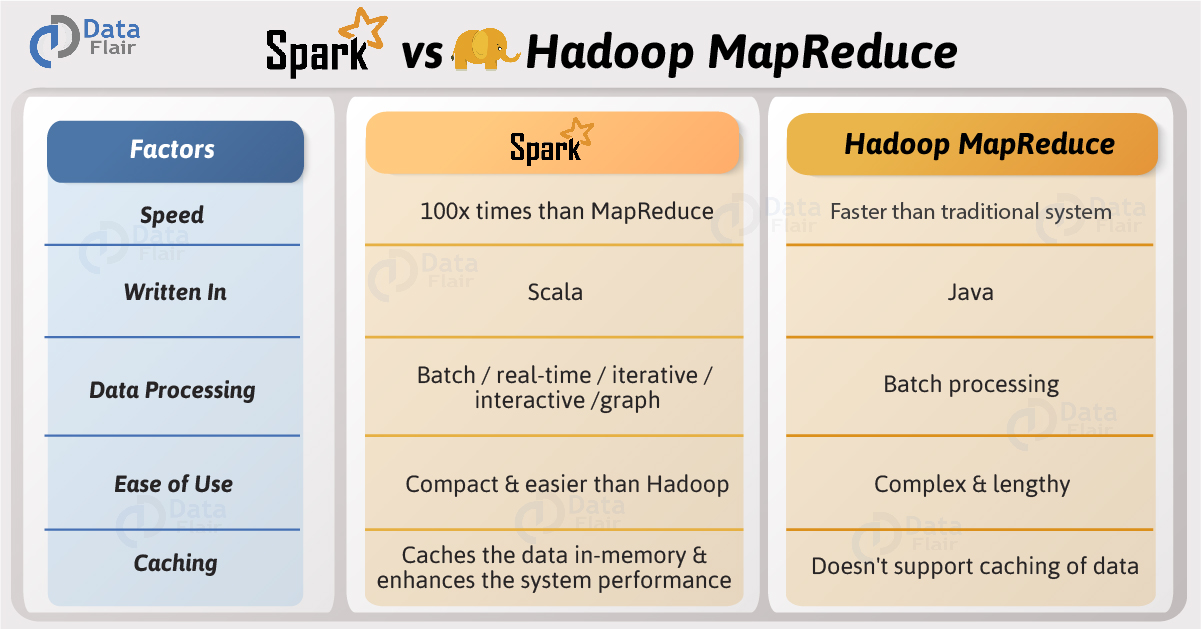


## Key Terminologies & Concepts

Before we delve deeper, let's familiarize ourselves with some terminologies and concepts.

* **Partitioned Data** — When working with a computer cluster, you can't just throw in a vanilla dataframe and expect it to know what to do. Because the processing tasks will be divided across multiple nodes, the data also has to be able to be divided across multiple nodes. Partitioned data refers to data that has been optimized to be able to be processed on multiple nodes.

* **Fault Tolerance** — In short, fault tolerance refers to a distributed system's ability to continue working properly even when a failure occurs. A failure could be a node bursting into flames for example, or just a communication breakdown between nodes.

* **Lazy Evaluation** — Lazy evaluation, or lazy computing, has to do with how code is compiled. When a compiler that is not lazy (which is called strict evaluation) compiles code, it sequentially evaluates each expression it comes across. A lazy compiler on the other hand, doesn’t continually evaluate expressions, but rather, waits until it is actually told to generate a result, and then performs all the evaluation all at once. So as it compiles code, it keeps track of everything it will eventually have to evaluate, and then whenever it is prompted to return something, it performs evaluations according to what it has in its evaluation log. This is useful because it makes programs more efficient as the compiler doesn’t have to evaluate anything that isn’t actually used.


## Spark Terms

### Resilient Distributed Datasets (RDDs)

**Spark RDDs (Resilient Distributed Datasets)** are data structures that are the core building blocks of Spark.
* an immutable, partitioned collection of records. They hold values, tuples, or other objects which are partitioned so that it can be processed on a distributed system.
* RDDs do not have a schema aka no columnar structure. Records are just recorded row-by-row, and are displayed similar to a list.
* DataFrames and Datasets are built on top of RDDs thus we can move between them easily by using API method calls.


**When to use RDDs?**
* you want low-level transformation and actions and control on your dataset
* your data is unstructured, such as media streams or streams of text
* you want to manipulate your data with functional programming constructs than domain specific expressions
* you don’t care about imposing a schema, such as columnar format, while processing or accessing data attributes by name or column
* you can forgo some optimization and performance benefits available with DataFrames and Datasets for structured and semi-structured data

### DataFrames, DataSets
**Spark DataFrames**, don't confuse them with Pandas DataFrames
  * have all of the features of RDDs but also have a schema aka like a relational database.
  * has a domain specific language API to manipulate your distributed data
  * data structure of choice for with PySpark.


**Spark DataSets**
  * similar to DataFrames but are **strongly-typed** aka datatype of the dataset must be declared before creation. Datatype of the dataset can be different from the records stored in it.
  * not used in PySpark because Python is a dynamically-typed language.


**When to use DataFrames or DataSets?**
* If you want rich semantics, high-level abstractions, and domain specific APIs, use DataFrame or Dataset.
* If your processing demands high-level expressions, filters, maps, aggregation, averages, sum, SQL queries, columnar access and use of lambda functions on semi-structured data, use DataFrame or Dataset.
* If you want higher degree of type-safety at compile time, want typed JVM objects, take advantage of Catalyst optimization, and benefit from Tungsten’s efficient code generation, use Dataset.
* If you want unification and simplification of APIs across Spark Libraries, use DataFrame or Dataset.
*  If you are a R user, use DataFrames.
*  If you are a Python user, use DataFrames and resort back to RDDs if you need more control.


## Spark RDD Transformations

RDD Transformations are Spark operations when executed on RDD, it results in a single or multiple new RDD’s. Since RDD are **immutable** in nature, transformations **always** create new RDD without updating an existing one hence, this creates an **RDD lineage**

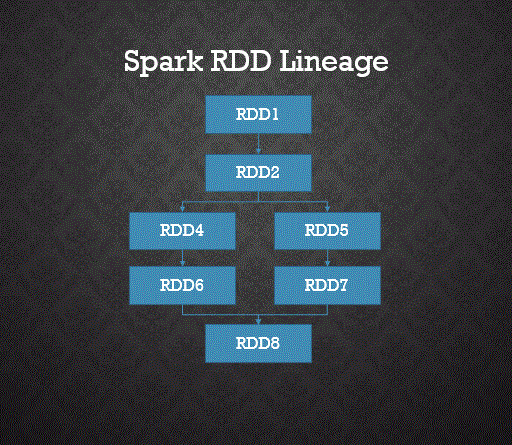

**Note** that RDD Lineage is also known as the RDD operator graph or RDD dependency graph.

RDD Transformations are **lazy operations** meaning none of the transformations get executed until you call an action on Spark RDD. 2 main types of RDD Transformations: **Narrow** and **Wide**.

### Narrow Transformation

Narrow transformations are the result of `map()` and `filter()` functions and these compute data that live on a single partition meaning there will not be any data movement between partitions to execute narrow transformations.

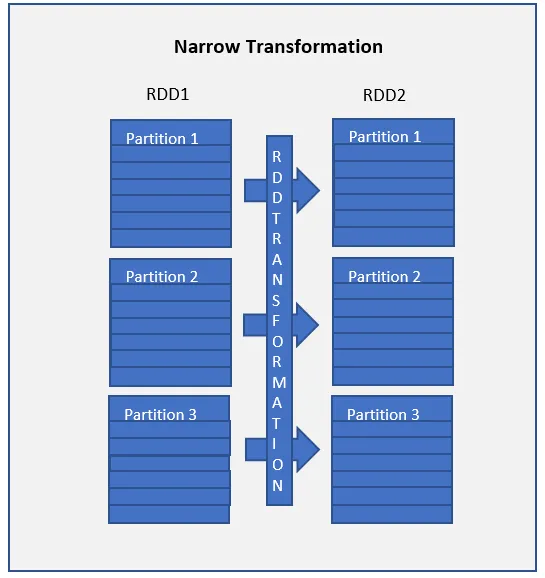

### Wide Transformation

Wide transformations are the result of `groupByKey()` and `reduceByKey()` functions and these compute data that live on many partitions meaning there will be data movements between partitions to execute wide transformations. Since these shuffles the data, they also called shuffle transformations.

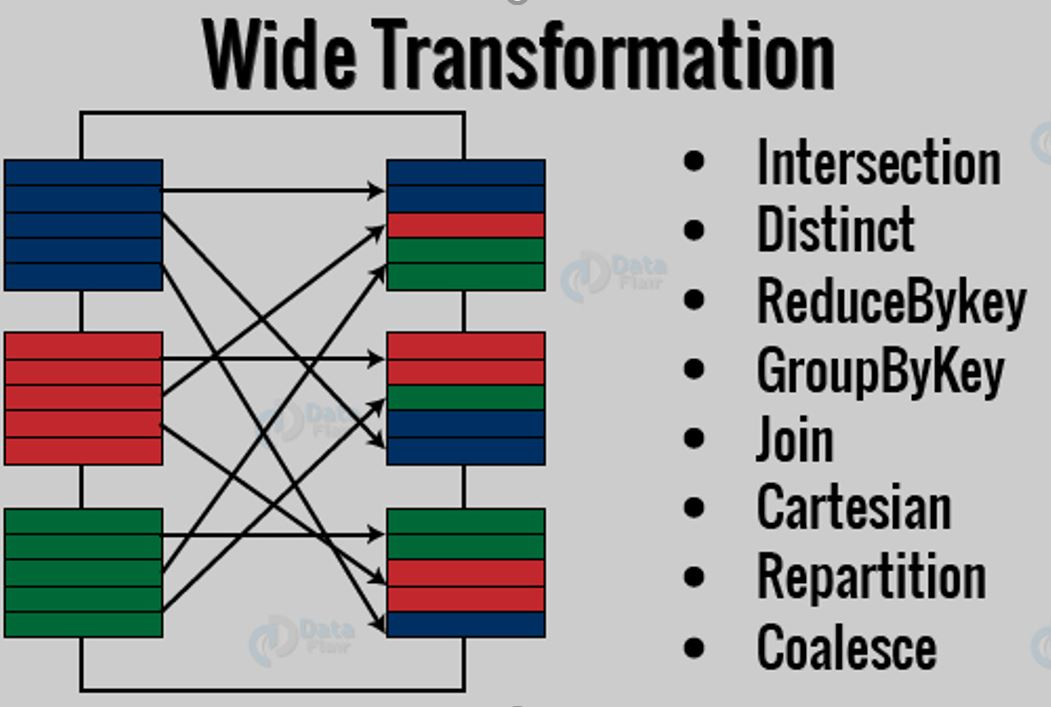

### Spark RDD Transformations Word Count Example in Scala

The steps a developer may use to this application:
1. load the file
2. split all words
3. map the word to a number
4. filter the words based on some criteria. Eg: count all words starting with 'a'
5. reduce by some criteria. Eg: merge all like words to create a unique list of words and their count
6. sort by some criteria. Eg: sort by key or word count
7. carry out some action. Eg: count the number of unique words, print the unique words to console, etc

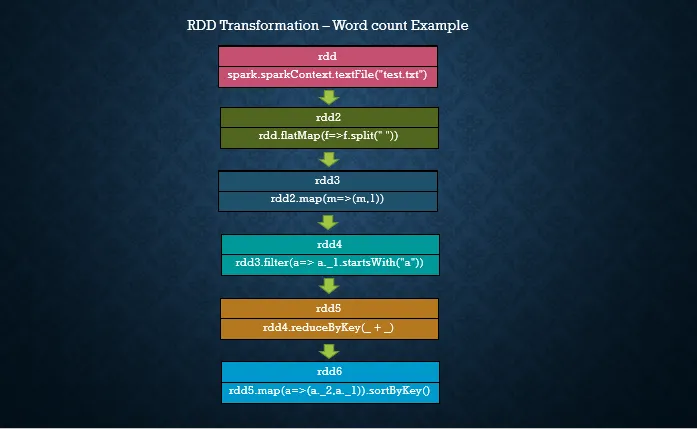

#### `flatMap()` Transformation

`flatMap()` transformation flattens the RDD after applying the function and returns a new RDD. On the below example, first, it splits each record by space in an RDD and finally flattens it. Resulting RDD consists of a single word on each record.

```scala
val rdd2 = rdd.flatMap(f=>f.split(" "))
```

#### `map()` Transformation

`map()` transformation is used the apply any complex operations like adding a column, updating a column, etc, the output of map transformations would always have the same number of records as input.

In our word count example, we are adding a new column with value 1 for each word, the result of the RDD is PairRDDFunctions which contains key-value pairs, word of type String as Key and 1 of type Int as value.

```scala
val rdd3:RDD[(String,Int)]= rdd2.map(m=>(m,1))
```

#### `filter()` Transformation

`filter()` transformation is used to filter the records in an RDD. In our example we are filtering all words that starts with an "a".

```scala
val rdd4 = rdd3.filter(a=> a._1.startsWith("a"))
```

#### `reduceByKey()` Transformation

`reduceByKey()` merges the values for each key with the function specified. In our example, it reduces the word string by applying the `sum` function on value. The result of our RDD contains unique words and their count.

```scala
val rdd5 = rdd3.reduceByKey(_ + _)
```

#### `sortByKey()` Transformation

`sortByKey(`) transformation is used to sort RDD elements by key. In our example, first, we convert `RDD[(String,Int])` to `RDD[(Int,String])` using `map` transformation and apply `sortByKey` which ideally does sort on an integer value. And finally, `foreach` with `println` statement to print all words in the RDD and their count as key-value pair to console.

```scala
val rdd6 = rdd5.map(a=>(a._2,a._1)).sortByKey()

//Print rdd6 result to console
rdd6.foreach(println)
```

#### Completed Word Count Example

```scala
import org.apache.spark.rdd.RDD
import org.apache.spark.sql.SparkSession

object WordCountExample {

  def main(args:Array[String]): Unit = {

    val spark:SparkSession = SparkSession.builder()
      .master("local[3]")
      .appName("wordcount example")
      .getOrCreate()

    val sc = spark.sparkContext

    val rdd:RDD[String] = sc.textFile("src/main/resources/test.txt")
    println("initial partition count:"+rdd.getNumPartitions)

    val reparRdd = rdd.repartition(4)
    println("re-partition count:"+reparRdd.getNumPartitions)
    
    // print rdd contents
    rdd.collect().foreach(println)

    // rdd flatMap transformation
    val rdd2 = rdd.flatMap(f=>f.split(" "))
    rdd2.foreach(f=>println(f))

    //Create a Tuple by adding 1 to each word
    val rdd3:RDD[(String,Int)]= rdd2.map(m=>(m,1))
    rdd3.foreach(println)

    //Filter transformation
    val rdd4 = rdd3.filter(a=> a._1.startsWith("a"))
    rdd4.foreach(println)

    //ReduceBy transformation
    val rdd5 = rdd3.reduceByKey(_ + _)
    rdd5.foreach(println)

    //Swap word,count and sortByKey transformation
    val rdd6 = rdd5.map(a=>(a._2,a._1)).sortByKey()
    println("Final Result")

    //Action - foreach
    rdd6.foreach(println)

    //Action - count
    println("Count : "+rdd6.count())

    //Action - first
    val firstRec = rdd6.first()
    println("First Record : "+firstRec._1 + ","+ firstRec._2)

    //Action - max
    val datMax = rdd6.max()
    println("Max Record : "+datMax._1 + ","+ datMax._2)

    //Action - reduce
    val totalWordCount = rdd6.reduce((a,b) => (a._1+b._1,a._2))
    println("dataReduce Record : "+totalWordCount._1)
    //Action - take
    val data3 = rdd6.take(3)
    data3.foreach(f=>{
      println("data3 Key:"+ f._1 +", Value:"+f._2)
    })

    //Action - collect
    val data = rdd6.collect()
    data.foreach(f=>{
      println("Key:"+ f._1 +", Value:"+f._2)
    })

    //Action - saveAsTextFile
    rdd5.saveAsTextFile("c:/tmp/wordCount")
    
  }
}
```